Confusion matrices are a tool to visualize the number of samples predicted as class i and belonging to
class j. A confusion matrix is a K ×K matrix whose elements Mi,j represent the number of samples
belonging to class j that are predicted as class i.
We start considering the Gaussian classifiers (MVG) on the IRIS dataset. We make use of the 2-to-1
dataset split that we employed in Laboratory 6 (see 6_Lab.pdf).
For the moment we assume that mis-classification costs are all equal to 1. We have seen that, in
this case, optimal decisions correspond to predicting the class which has maximum posterior probability.

Compute the confusion matrix for the predictions of the MVG classifier on the IRIS dataset and the Tied one.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import load_split
import Bayes_decisions_Model_evaluation as BDME
import MVG.MVG as MVG

In [2]:
D, L = load_split.load_iris()
print(D.shape, L.shape)

(4, 150) (150,)


In [3]:
(DTR, LTR), (DVAL, LVAL) = load_split.split_db_2to1(D, L)
print(f"Training: DTR={DTR.shape}, LTR={LTR.shape}")
print(f"Validation: DVAL={DVAL.shape}, LVAL={LVAL.shape}")

Training: DTR=(4, 100), LTR=(100,)
Validation: DVAL=(4, 50), LVAL=(50,)


In [4]:
# MVG
P_MVG = MVG.pipeline(DTR, LTR, DVAL)
res = BDME.computeConfMatrix(P_MVG, LVAL)

In [5]:
P_MVG = MVG.pipeline_TiedCov(DTR, LTR, DVAL)
res = BDME.computeConfMatrix(P_MVG, LVAL)

Given the limited number of errors, a detailed analysis of the IRIS dataset is not very interesting. We
thus turn our attention to a larger evaluation dataset.

In the following we will employ the outputs of the classifier of Laboratory 7.
You can use your version of the classifier for tercets or use the one provided as solution to Laboratory 7.
The class-conditional log-likelihoods and the corresponding tercet labels are provided in Data/comme-
dia_ll.npy and Data/commedia_labels.npy.

Given the matrix of class-conditional log-likelihoods, compute the confusion matrix for decisions based
on uniform prior and uniform cost assumptions (i.e. maximum posterior class probability decisions).

In [6]:
# Load data
log_likelihoods = np.load("../data/commedia_ll.npy")
labels = np.load("../data/commedia_labels.npy")
print("Log-likelihoods shape:", log_likelihoods.shape)
print("Labels shape:", labels.shape)

Log-likelihoods shape: (3, 1204)
Labels shape: (1204,)


In [7]:
# Assuming uniform prior distribution, equal for each classes
classes = np.unique(labels)
Priors = np.ones(len(classes)) / len(classes)  # vet of 1 each one divide by the unique number of class

# Having the ll we can compute the posterior probability e predict the labels
res = BDME.computeConfMatrixFromLL(labels, log_likelihoods, Priors)

# Optimal Bayes decision

We now focus on making optimal decisions when priors and costs are not uniform.
Optimal Bayes decisions are decisions that minimize the expected Bayes cost,
from the point of view of the recognizer R.

...

Threshold became:

$$
t = - \log \frac{\pi_1 C_{fn}}{(1 - \pi_1) C_{fp}}
$$

In [8]:
# Load data
log_likelihoods_infpar = np.load("../data/commedia_llr_infpar.npy")
labels_infpar = np.load("../data/commedia_labels_infpar.npy")
print("Log-likelihoods shape:", log_likelihoods_infpar.shape)
print("Labels shape:", labels_infpar.shape)

Log-likelihoods shape: (802,)
Labels shape: (802,)


diﬀerent priors and costs:

- [π1 = 0.5; Cfn= C0,1 = 1; Cfp= C1,0 = 1]

- [π1 = 0.8; Cfn= C0,1 = 1; Cfp= C1,0 = 1]

- [π1 = 0.5; Cfn= C0,1 = 10; Cfp= C1,0 = 1]

- [π1 = 0.8; Cfn= C0,1 = 1; Cfp= C1,0 = 10]



In [9]:
PriorTrue=0.5
Cfn=1
Cfp=1
res1, t1 = BDME.optimalBayesDecisionClassifier(log_likelihoods_infpar, labels_infpar, PriorTrue, Cfn, Cfp)

PriorTrue=0.8
Cfn=1
Cfp=1
res2, t2 = BDME.optimalBayesDecisionClassifier(log_likelihoods_infpar, labels_infpar, PriorTrue, Cfn, Cfp)

PriorTrue=0.5
Cfn=10
Cfp=1
res3, t3 = BDME.optimalBayesDecisionClassifier(log_likelihoods_infpar, labels_infpar, PriorTrue, Cfn, Cfp)

PriorTrue=0.8
Cfn=1
Cfp=10
res4, t4 = BDME.optimalBayesDecisionClassifier(log_likelihoods_infpar, labels_infpar, PriorTrue, Cfn, Cfp)

## Binary task: evaluation
We now turn our attention at evaluating the predictions made by our classifier $\mathcal{R}$ for a target application with Prior and costs given by the triplet $(\pi_1, C_{fn}, C_{fp})$ (i.e. how good is the classification). <br>
At evaluation time,  $\mathcal{R}$ performs decisions for the test samples and finds the optimal ones according to the Posteriors (which are its believes). WE want to know what is the cost when using the system over data having their own labels. As we have seen,
we can compute the **empirical Bayes risk** (or **detection cost function**, *DCF*), that represents the cost that
we pay due to our decisions $c^* = argmin_c \{ C_{X, \mathcal{R}}(c) \}$
for the test data. The risk can be expressed as:
$$
\mathcal{B} = \mathop{\mathbb{E}}_{X, C \mid \mathcal{E}} \left[ C^* (x, \mathcal{R} \mid c)\right]
$$
Beware that this can also be written as: $\mathcal{B} = \mathop{\mathbb{E}}_{X, C \mid \mathcal{E}} \left[ C^* (a^*(x, \mathcal{R}) \mid c)\right]$ since $C^*$ is the cost for taking the **optimal** decision $a^*$. However, to simplify the notation, we will usually use the first representation.<br>
In the formula, $\mathcal{E}$ denotes the evaluation population, assumed to be distributed according
to $X, C \mid \mathcal{E}$. $\mathcal{E}$ is basically an evaluator who knows the complete distribution of
data. <br>
So, $\mathcal{B}$ is nothing else than the expected cost for our evaluation samples, computer over optimal costs of optimal decisions $a^* (x, \mathcal{R})$. <br>
Since $\mathcal{E}$ knows the complete distribution of the data, we can say that the evaluation population is sampled from $f_{X, C \mid \mathcal{E}} (x, c)$, which is the distribution of all the $(x_t, c_t)$ (which are the oberved samples with their observed labels). <br>
So, when we apply the Classifier $\mathcal{R}$ over these samples from the distribution above, we want to know the cost to pay. For each pair $(X, C)$ we can take the optimal cost for the optimal decision, $C^* (x, \mathcal{R} \mid c)$, weighted by the distribution density $f_{X, C \mid \mathcal{E}} (x, c)$:
$$
\mathcal{B} = \mathop{\mathbb{E}}_{X, C \mid \mathcal{E}} \left[ C^* (x, \mathcal{R} \mid c)\right] = \int \int C^*(x, \mathcal{R} \mid c) f_{X, C \mid \mathcal{E}}(x, c) \, dx \, dc
$$
Since in our case the classes are discrete, instead of an integral over $dc$ we can insert a sum:
$$
\mathcal{B} = \mathop{\mathbb{E}}_{X, C \mid \mathcal{E}} \left[ C^* (x, \mathcal{R} \mid c)\right] = \sum_{c = 0}^{K-1}  \int C^*(x, \mathcal{R} \mid c) f_{X, C \mid \mathcal{E}}(x, c) \, dx
$$
If $\mathcal{R}$ is a Generative Model, like in our case, we can factorize the Joint into the conditional and the Prior:
$$
\mathcal{B} = \mathop{\mathbb{E}}_{X, C \mid \mathcal{E}} \left[ C^* (x, \mathcal{R} \mid c)\right] = \sum_{c = 0}^{K-1}  \int C^*(x, \mathcal{R} \mid c) f_{X \mid C, \mathcal{E}}(x \mid c) P(C = c) \, dx \\
= \sum_{c = 0}^{K-1}  \int C^*(x, \mathcal{R} \mid c) f_{X \mid C, \mathcal{E}}(x \mid c) \pi_c \, dx
$$
Since the Prior $\pi_c$ does not depend on the test sample $x$ (which is the integration variable), we can put it outside the integral. The final formula for the expected Bayes Risk is thus:
$$
\mathcal{B} = \mathop{\mathbb{E}}_{X, C \mid \mathcal{E}} \left[ C^* (x, \mathcal{R} \mid c)\right] = \sum_{c = 0}^{K-1}  \pi_c \int C^*(x, \mathcal{R} \mid c) f_{X \mid C, \mathcal{E}}(x \mid c) \, dx
$$
This whole formula encodes that, for each class $c$, we have to first compute the cost of optimal decision for sample $x$ using the Recongizer $\mathcal{R}$, given that $x \in c$, then we have to multiply this cost with the conditional and integrate over all the samples to find the expectation wrt the samples of class $c$, then we have to sum this value over all the classes. <br>
Note that the distribution $X \mid C, \mathcal{E}$ reflects the knowledge of the evaluator $\mathcal{E}$, not
the knowledge of the Recognizer $\mathcal{R}$. <br> <br>
The problem now is that we **do not know** $f_{X \mid C, \mathcal{E}}(x \mid c)$ (which is the conditional density according to evaluator $\mathcal{E}$, so the data distribution according to $\mathcal{E}$). However, we have at our disposal a **labeled dataset**: $(x_0, c_0), ..., (x_N, c_{K-1})$. It's important to stress the fact that **we know the actual labels** of this data. We assume that these samples are drawn from the distribution $X \mid C, \mathcal{E}$, according to $f_{X \mid C, \mathcal{E}}(x \mid c)$. This means that,  if the number of samples per class
becomes large, we can approximate the integral of the expectation by
averaging the cost over the samples of each class. This is called **empirical Expectation**:
$$
\int C^*(x, \mathcal{R} | c) f_{X|C, \mathcal{E}}(x | c) dx \approx \frac{1}{N_c} \sum_{i | c_i = c} C^*(x_i, \mathcal{R} | c)
$$
where $N_c$ is the number of classes. <br>
If we compute this for each class and multiply it by the Prior of each class and them sum all together, we can finally compute the **Empirical Bayes Risk**:
$$
\mathcal{B}_{\text{emp}} = \sum_{c=0}^{K-1} \frac{\pi_c}{N_c} \sum_{i | c_i = c} C^*(x_i, \mathcal{R} | c) = \sum_{c=0}^{K-1} \frac{\pi_c}{N_c} \sum_{i | c_i = c} C^*(c_{i}^* | c)
$$
and we can say that $\mathcal{B} \approx \mathcal{B}_{\text{emp}}$. <br>
In the second formula, $c_i$
is the actual class for sample $x_i$ and $c_{i}^*$
is the predicted class (by $\mathcal{R}$) for the same sample. <br>
For a binary problem, $\mathcal{B}_{\text{emp}}$ can also be expressed as:
$$
\mathcal{B}_{\text{emp}} = \pi_T C_{fn} P_{fn} + (1 - \pi_T) C_{fp} P_{fp}
$$
where $P_{fn}$ and $P_{fp}$
are the false negative and false positive rates (also called $\text{FNR}$, $\text{FPR}$). These can be computed from the confusion matrix $\mathbf{M}$.
Remember that $M_{i,j}$ represents the number of samples of class $j$ predicted as belonging to class $i$. We
can then compute:
$$
P_{fn} = \frac{FN}{FN + TP} = \frac{M_{0,1}}{M_{0,1} + M_{1,1}}, \quad P_{fp} = \frac{FP}{FP + TN} = \frac{M_{1,0}}{M_{0,0} + M_{1,0}}
$$





We can observe that
• When the prior for class 1 increases, the classifier tends to predict class 1 more frequently
• When the cost of predicting class 0 when the actual class is 1, C0,1 increases, the classifier will
make more false positive errors and less false negative errors. The opposite is true when C1,0 is
higher.

Binary task: evaluation
We now turn our attention at evaluating the predictions made by our classifier Rfor a target application
with prior and costs given by (π1,Cfn,Cfp).
3
At evaluation time, we use the real labels of the test set to evaluate the decisions c∗. As we have seen,
we can compute the empirical Bayes risk (or detection cost function, DCF), that represents the cost that
we pay due to our decisions c∗for the test data. The risk can be expressed as
DCFu = B=
K−1
k=0
πk
Nk i|ci =k
C(c∗
i|k)
= π1CfnPfn + (1−π1)CfpPfp
where ci is the actual class for sample i and c∗
i is the predicted class for the same sample. Pfn and Pfp
are the false negative and false positive rates. These can be computed from the confusion matrix M.
Remember that Mi,j represents the number of samples of class j predicted as belonging to class i. We
can then compute
M0,1
M1,0
Pfn=
FN
FN + TP=
, Pfp=
M0,1 + M1,1
FP
FP + TN=
M0,0 + M1,0
Write a function that computes the Bayes risk from the confusion matrix corresponding to the optimal
decisions for an application (π1,Cfn,Cfp) (use the same values both for computing the cost and for
computing the decisions).

In [10]:
PriorsSet = [0.5, 0.8, 0.5, 0.8]
CfnSet = [1, 1, 10, 1]
CfpSet = [1, 1, 1, 10]

risks = []
for testIndex in range(len(PriorsSet)):
    risk = BDME.computeEmpiricalBayesRisk(log_likelihoods_infpar, labels_infpar, PriorsSet[testIndex], CfnSet[testIndex], CfpSet[testIndex])
    risks.append(risk)

print(f"\n\nEmpirical Bayes Risk, Commedia infPar Binary Classifier:")
for (index, risk) in enumerate(risks):
    print(f"- Test {index}: {risk :.3f}")



Empirical Bayes Risk, Commedia infPar Binary Classifier:
- Test 0: 0.256
- Test 1: 0.225
- Test 2: 1.118
- Test 3: 0.724


**The Bayes risk allows us comparing diﬀerent systems, however it does not tell us what is the benefit of using our recognizer with respect to optimal decisions based on prior information only.**

**We can compute a normalized detection cost, by dividing the Bayes risk by the risk of an optimal system that does not
use the test data at all.**

$\mathcal{B}_{\text{emp}}$ is also called (**un-normalized**) *Detection Cost Function* (DCF). We say
*un-normalized* because this value doesn’t tell a lot by itself. <br>
We can compute
a **normalized Detection Cost Function**, by dividing the Bayes risk by the risk of an optimal system that does not
use the test data at all and only relies on Priors. <br>
If we consider a dummy system that always classifies a test sample as $H_T$, we would have $P_{fp} = 1$, $P_{fn} = 0$ that imply $DCF_u = (1 - \pi_T)C_{fp}$. <br>
Similarly, a dummy system that always classifies a test sample as $H_F$ we would have $P_{fp} = 0$, $P_{fn} = 1$ that imply $DCF_u = \pi_T C_{fn}$. <br>
We compare the system DCF w.r.t. the best dummy system to get the normalized DCF:

$$
\mathcal{B}_{\text{emp , norm. }} = DCF(\pi_T, C_{fn}, C_{fp}) = \frac{DCF_u(\pi_T, C_{fn}, C_{fp})}{\min(\pi_T C_{fn}, (1 - \pi_T)C_{fp})}
$$

Note that the best dummy system corresponds to optimal Bayes decisions based on Prior information alone. <br>
So, let's write the function to normalize te DCFs:


In [11]:
PriorsSet = [0.5, 0.8, 0.5, 0.8]
CfnSet = [1, 1, 10, 1]
CfpSet = [1, 1, 1, 10]

risks = []
for testIndex in range(len(PriorsSet)):
    risk = round(BDME.computeEmpiricalBayesRisk_Normalized
            (log_likelihoods_infpar,
             labels_infpar,
             PriorsSet[testIndex],
             CfnSet[testIndex],
             CfpSet[testIndex]), 3)
    risks.append(risk)

print(f"\n\nEmpirical Bayes Risk Normalized, Commedia infPar Binary Classifier:")
for (index, risk) in enumerate(risks):
    print(f"- Test {index}: {risk :.3f}")



Empirical Bayes Risk Normalized, Commedia infPar Binary Classifier:
- Test 0: 0.511
- Test 1: 1.126
- Test 2: 2.236
- Test 3: 0.904


Based on what we obtain, we can actually say if our system is *good / useful* or *harmful /useless*:
- if $DCF(\pi_T, C_{fn}, C_{fp}) > 1 \Rightarrow$ our system is **harmful**
- if $DCF(\pi_T, C_{fn}, C_{fp}) \lt 1 \Rightarrow$ our system is **good**

**We can observe that only in two cases the DCF is lower than 1, in the remaining cases our system is actually harmful.**


## Minimum detection costs

We have seen during the lectures that, for binary tasks, we can measure the contribution to the cost due
to poor class separation and the contribution due to poor score calibration: our classifier does not produce outputs that represent log-likelihood ratios, thus the theoretical threshold is not optimal anymore
(note that this happens even for generative models — for example, the model parameters may not be
consistent between training and test population). <br>
**Scores can be re-calibrated** by using a (small) set of labeled samples, that behave similarly to the evaluation population and were not used for model training (i.e. a validation set). Alternatively, we can
compute the optimal threshold for a given application on the same validation set, and use such threshold
for the test population (K-fold cross validation can be also exploited to extract validation sets from the
training data when validation data is not available). <br>
Even if we do not have available such data, it may still be interesting knowing how good the model would
perform if we had selected the best possible threshold. **To this extent, we can compute the (normalized) DCF over the test set using all possible thresholds, and select its minimum value.** <br>
In practice, we have to make these considerations:
- The $DCF(\pi_T, C_{fn}, C_{fp})$ (or, it's the same, the $\mathcal{B}_{\text{emp, norm}}$) measures how well our system makes decisions. These decisions are determined by **comparing a score to a threshold.** In our case the scores are the log-likelihoods ratios and the threshold is computed from the application triplet of type $(\pi_{H_T}, C_{fn}, C_{fp})$.
-  If we shift the threshold **without** crossing a score, the classification of any given sample doesn't change. For example, imagine we have scores $[1, 2, 3]$ and our threshold is $t = 1.5$. Samples with scores $2$ and $3$ are classified as one class, and the sample with score $1$ as the other. If we change the threshold to $t = 1.7$, the classifications remain the same. Therefore, the confusion matrix, and consequently the DCF, also remain the same.
- So, the DCF is **piecewise constant** (it's like a *step function*, more precisely it's a monotonic increasing step function): **it only changes at the score values** because the only time the classification of a sample changes is when the threshold moves past its score.

Therefore, to compute all the possible values for the DCF and select the *minimum*, we only need to check the DCF at the points where it can change.  And those points are precisely the **test scores**. <br>
So, more precisely, we consider a set that contains all the possible test scores, sorted in an **increasing order**, plus the limit values of $\infty$ and $- \infty$ to represent the extreme cases of rejecting all samples and accepting all samples:
$$
\left( - \infty, s_0, s_1, s_2, ..., s_M, \infty \right)
$$
We consider all the elements in this set as thresholds $(t_0, t_1, ..., t_N)$ , and for each threshold $t$ we compute  the confusion matrix on the test set itself that would be obtained
if scores were thresholded at $t$, and the corresponding normalized DCF using the code developed in the previous section. Remember that in our case the **scores are the $\text{llr}(x)$**, that we have to sort in increasing order:

In [12]:
PriorsSet = [0.5, 0.8, 0.5, 0.8]
CfnSet = [1, 1, 10, 1]
CfpSet = [1, 1, 1, 10]

risks = []
for testIndex in range(len(PriorsSet)):
    risk = round(BDME.computeMinEmpiricalBayesRisk_Normalized
            (log_likelihoods_infpar,
             labels_infpar,
             PriorsSet[testIndex],
             CfnSet[testIndex],
             CfpSet[testIndex]), 3)
    risks.append(risk)

print(f"\n\nMinimum Empirical Bayes Risk Normalized, Commedia infPar Binary Classifier:")
for (index, risk) in enumerate(risks):
    print(f"- Test {index}: {risk :.3f}")



Minimum Empirical Bayes Risk Normalized, Commedia infPar Binary Classifier:
- Test 0: 0.506
- Test 1: 0.752
- Test 2: 0.842
- Test 3: 0.709


**With the except of the first application, we can observe a significant loss due to poor calibration.** This
loss is even more significant for the two applications which had a normalized DCF larger than 1.

In these
two scenarios, our classifier is able to provide discriminant scores, but **we were not able to employ the scores to make better decisions than those that we would make from the Prior alone** (so, using the *dummy system* that just looks at $\pi_{H_T}$).

## ROC curves
ROC (*Receiver Operating Characteristic*) curves are a method to evaluate the trade-off between the different kind of errors for our Recognizer $\mathcal{R}$. ROC curves can be used, for example, to plot false positive rates $ \left( \text{FPR} = P_{fp} \right)$ versus true positive rates $ \left( \text{TPR} = P_{tp} \right)$ as the
threshold $t$ varies.

**Note that these plots do not account for errors due to poor selection of the threshold
(i.e. mis-calibration), since they simply plot how the error rates change when we modify the threshold
on the evaluation set.**

Here we're gonna plot the ROC which confronts $P_{fp}$ with $P_{tp}$ for the 2-class problem scores (array of $\text{llr}(x)$):

In [13]:
def plotROC_FPRvsTPR(scores, LVAL):
    """
    Plot the ROC curve for a given set of scores and labels.
    Args:
    - scores: log likelihood ratios
    - LVAL: actual labels
    """


    #1. sort the scores in increasing order to use them as thresholds
    sortedScores = np.sort(scores)

    #2. add the -inf and +inf to the sorted scores to use them as thresholds
    sortedScores = np.concatenate(([-np.inf], sortedScores, [np.inf]))
    #now we have sortedScores = (-inf, s0, s1, s2, ..., sN, +inf)

    #initialize the x and y axis for the ROC curve
    xAxis = []
    yAxis = []

    for t in sortedScores:
        #score IS THE THRESHOLD!
        #Classification rule: if llr > t, classify as 1, else classify as 0
        PVAL = np.where(scores > t, 1, 0)

        #compute confusion matrix
        confMatrix = BDME.computeConfMatrix(PVAL, LVAL)


        #now, extract the TP, TN, FP and FN from the confusion matrix
        TP = confMatrix[1, 1] #True Positives
        TN = confMatrix[0, 0] #True Negatives
        FP = confMatrix[1, 0] #False Positives
        FN = confMatrix[0, 1] #False Negatives

        #comupte Pfn, Pfp
        Pfn = FN / (FN + TP) #False Negative Rate
        Pfp = FP / (FP + TN) #False Positive Rate
        Ptp = 1 - Pfn #True Positive Rate

        #ROC: Pfp vs Ptp
        #Pfp on x axis, Ptp on y axis
        xAxis.append(Pfp)
        yAxis.append(Ptp)

    #3. plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(xAxis, yAxis, marker='o', linestyle='-', markersize=1, color='blue')
    plt.title("ROC Curve: FPR vs TPR", pad=20, fontsize=14)
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.grid(True)
    #limit the x and y axis to [0, 1], since the values of FPR and TPR are between 0 and 1
    #this is done for better visualization of the ROC curve, not to have empty parts of the plot
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()


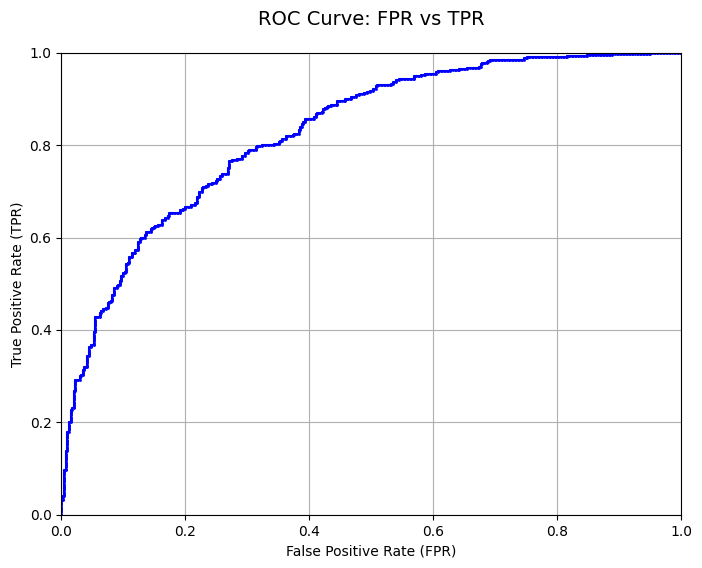

In [14]:
plotROC_FPRvsTPR(log_likelihoods_infpar, labels_infpar)

## Bayes error plots
The last tool that we consider to assess the performance of our recognizer $\mathcal{R}$ consists in plotting the normalized costs as a function of an **effective Prior** $\tilde{\pi}$. <br>
For binary problems, an application defined by the triplet $(\pi_{H_T}, C_{fn}, C_{fp})$ is actually **equivalent** to a *general* application $(\tilde{\pi}, 1, 1)$ where the costs are normalized and have both unitary value and the $\tilde{\pi}$ is the effective Prior, calculated as:
$$
\tilde{\pi} = \frac{\pi_T C_{fn}}{\pi_T C_{fn} + (1 - \pi_T) C_{fp}}
$$
In order to demonstrate this we have to recall the classification rule we use with the binary Classifier, which compares the $\text{llr}(x)$ with a Threshold $t$:

$$
c^* =
\begin{cases}
    H_T & \text{if } \text{llr}(x) = \log \frac{f_{X|C,\mathcal{R}}(x|H_T)}{f_{X|C,\mathcal{R}}(x|H_F)} > t = - \log \frac{\pi_{H_T} C_{fn}}{(1- \pi_{H_T}) C_{fp}} \\ \\
    H_F & \text{if } \text{llr}(x) = \log \frac{f_{X|C,\mathcal{R}}(x|H_T)}{f_{X|C,\mathcal{R}}(x|H_F)} \le t = - \log \frac{\pi_{H_T} C_{fn}}{(1- \pi_{H_T}) C_{fp}}
\end{cases}
$$

The threshold $t$ can be rewritten as:
$$
t = \log \frac{(1- \pi_{H_T}) C_{fp}}{\pi_{H_T} C_{fn}}
$$

Now, let's consider the normalized cost scenario where the costs of false negative and false positive are both 1 ($C'_{fn} = 1$ and $C'_{fp} = 1$) and the effective Prior for the true class is $\tilde{\pi}$. The classification rule in this normalized scenario would have a threshold $\tilde{t}$:

$$
\tilde{t} = - \log \frac{\pi_{H_T} C'_{fn}}{(1- \pi_{H_T}) C'_{fp}} \bigg|_{C'_{fn} = C'_{fp} = 1} = - \log \frac{\tilde{\pi} \cdot 1}{(1 - \tilde{\pi}) \cdot 1} = - \log \frac{\tilde{\pi}}{1 - \tilde{\pi}} = \log \frac{1 - \tilde{\pi}}{\tilde{\pi}}
$$


**The fundamental idea behind the effective Prior is that the decision boundary (the threshold) should correspond to the same operating point in both the original and the normalized cost scenarios. Since in the normalized scenario we have unitary costs, the effective Prior will take into account the original costs ($C_{fn}$ and $C_{fp}$) in order to make the two applications equivalent.** Therefore, we can equate the thresholds:

$$t = \tilde{t}$$

$$
\log \left( \frac{(1- \pi_{H_T}) C_{fp}}{\pi_{H_T} C_{fn}} \right) = \log \left( \frac{1 - \tilde{\pi}}{\tilde{\pi}} \right)
$$

We can then exponentiate both terms:

$$
\frac{(1- \pi_{H_T}) C_{fp}}{\pi_{H_T} C_{fn}} = \frac{1 - \tilde{\pi}}{\tilde{\pi}}
$$

Now, we solve this equation for $\tilde{\pi}$:

$$
(1 - \tilde{\pi}) \pi_{H_T} C_{fn} = \tilde{\pi} (1 - \pi_{H_T}) C_{fp}
$$

$$
\pi_{H_T} C_{fn} - \tilde{\pi} \pi_{H_T} C_{fn} = \tilde{\pi} (1 - \pi_{H_T}) C_{fp}
$$

$$
\pi_{H_T} C_{fn} = \tilde{\pi} (1 - \pi_{H_T}) C_{fp} + \tilde{\pi} \pi_{H_T} C_{fn}
$$

$$
\pi_{H_T} C_{fn} = \tilde{\pi} [ (1 - \pi_{H_T}) C_{fp} + \pi_{H_T} C_{fn} ]
$$

Finally, we isolate the effective Prior $\tilde{\pi}$:

$$
\tilde{\pi} = \frac{\pi_{H_T} C_{fn}}{(1 - \pi_{H_T}) C_{fp} + \pi_{H_T} C_{fn}}
$$

This demonstrates how the formula for the effective Prior arises from equating the decision thresholds of the original cost scenario and the normalized cost scenario. <br> <br>
So, The normalized Bayes Error Plot allows assessing the performance of the Recognizer $\mathcal{R}$ as **we vary the application**, i.e. as a function of prior log-odds:
$$
\tilde{p} = \log \frac{1 - \tilde{\pi}}{\tilde{\pi}}
$$
In order to compute the Bayes Error Plot, we can consider values of $\tilde{p}$ ranging, for example, from $-3$ to $+3$. Then, for each value of $\tilde{p}$, we compute $\tilde{\pi}$:
$$
\tilde{p} = \log \frac{1 - \tilde{\pi}}{\tilde{\pi}} \Longleftrightarrow e^{\tilde{p}} (1- \tilde{\pi}) = \tilde{\pi} \Longleftrightarrow \tilde{\pi} = \frac{e^{\tilde{p}}}{1 + e^{\tilde{p}}} \Longleftrightarrow \tilde{\pi} = \frac{1}{1 + e^{- \tilde{p}}}
$$
After that, we compute the normalized DCF, and the normalized minimum DCF corresponding to $\tilde{\pi}$ and then plot these values as a function of $\tilde{p} = \log \frac{1 - \tilde{\pi}}{\tilde{\pi}}$:

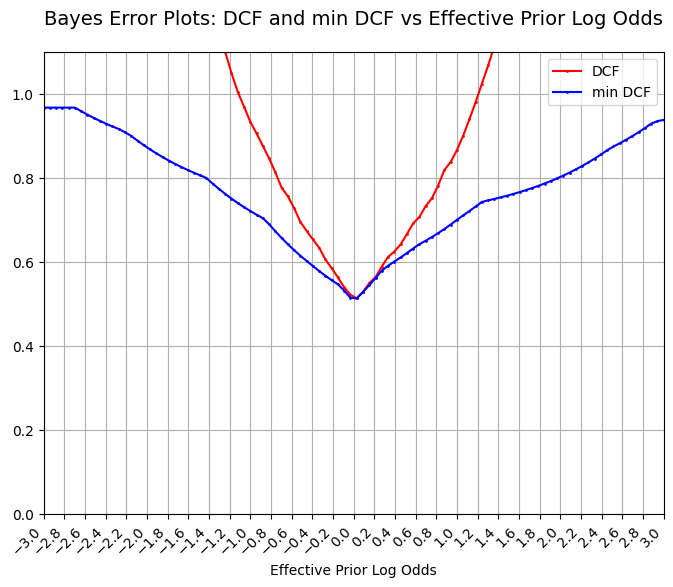

In [15]:
effPriorLogOdds = np.linspace(-3, 3, 100) #range of log odds ratios

BDME.plotBayesErrorPlots(effPriorLogOdds, log_likelihoods_infpar, labels_infpar) #plot the Bayes error plots for the given range of log odds ratios and scores

Analysis about the graphic result:
- The application is a general, normalized application described by the triplet $(\tilde{\pi}, 1, 1)$. $\tilde{\pi}$ is computed from the Effective Priors log-odds $\tilde{p} = \log \frac{1 - \tilde{\pi}}{\tilde{\pi}}$. So $\tilde{\pi}$ is a function of $\tilde{p}$. This means the $\text{DCF}(\tilde{\pi}, 1, 1)$ and $\text{min DCF}(\tilde{\pi}, 1, 1)$ computed here are as well functions of $\tilde{p}$ and can be expressed as $\text{DCF}(\tilde{p}, 1, 1)$ and $\text{min DCF}(\tilde{p}, 1, 1)$. By changing $\tilde{p}$ we change the application and therefore we change $\text{DCF}(\tilde{p}, 1, 1)$ and $\text{min DCF}(\tilde{p}, 1, 1)$. The Bayes Error Plot wants to show these changes when varying $\tilde{p}$.
- The blue curve represents the $\text{min DCF}$ as a function of the Effective Prior log odds $\tilde{p}$ and represents the **best possible performance** the Recognizer $\mathcal{R}$ is able to deliver if we set an effective prior log-odds. It acts as a lower bound for the actual $\text{DCF}$. We can note, and this is quite expected (although for very harmful models it's not always the same), that the model is always **good/useful** for each value of $\tilde{p}$ because the $\text{min DCF}$ always remains below $1$, so the model is able to achieve better results than the best dummy system which just relies on the Effective Priors.
- The red curve represents the $\text{DCF}$ as a function of the Effective Prior log odds $\tilde{p}$ and shows the actual decision cost achieved by the Recognizer $\mathcal{R}$ at different operating points defined by the $\tilde{p}$ we choose. We can see that in this case, for values of $\tilde{p}$ approximately not belonging to the interval $(-1;1.4]$ the model becomes **harmful/useless** because $\text{DCF}(\tilde{p}, 1, 1) > 1$ so it cannot beat anymore the best of the dummy systems.
- The gap between the $\text{DCF}(\tilde{p}, 1, 1)$ and $\text{min DCF}(\tilde{p}, 1, 1)$ indicates the the **miss-calibration error** and indicates the room for improvement in the Classifier $\mathcal{R}$.
- The minimum of the $\text{min DCF}(\tilde{p}, 1, 1)$ curve (blue curve) suggests the **theoretically optimal operating point** for the recognizer $\mathcal{R}$. It corresponds to the working point $\tilde{p} = 0$, which in turn corresponds to this Effective Prior:
  $$
  \tilde{\pi}_{\tilde{p} = 0} = \tilde{\pi}_{\text{O.O.P.}} = \frac{e^{\tilde{p}}}{1 + e^{\tilde{p}}} \bigg|_{\tilde{p} = 0} = \frac{1}{1+1} = \frac{1}{2}
  $$
  $\tilde{\pi} = 0.5$ **indicates equal Prior probabilities for both classes in the effective normalized scenario** $\left(\tilde{\pi}_{H_T} = \tilde{\pi}_{H_F} = 0.5 \right)$.
- The shape of the $\text{DCF}$ curve tells us about the **robustness** of the system. A flatter curve indicates that the performance is less sensitive to changes in the operating conditions whereas a steeper curve tells us the Recognizer is much more sensitive to $\tilde{p}$. We can observe that the $\text{DCF}(\tilde{p}, 1, 1)$ is **much more sensitive** to the changes in the operating conditions than the $\text{min DCF}(\tilde{p}, 1, 1)$.

## Comparing Recognizers
We now employ the tools that we have seen to compare two different recognizers for the same 2-class
problem: correspond to the pseudocounts $\mathcal{E} = 0.001$
and $\mathcal{E} = 1$ variations of the Laboratory 7 multinomial model.

In [16]:
#Load llrs (scores) and labels for the second model having pseucocounts eps = 1
llr_infPar_eps1 = np.load("../data/commedia_llr_infpar_eps1.npy")
print(f"llr_infPar_eps1 shape: {llr_infPar_eps1.shape}")
labels_infPar_eps1 = np.load("../data/commedia_labels_infpar_eps1.npy")
print(f"labels_infPar_eps1 shape: {labels_infPar_eps1.shape}")

llr_infPar_eps1 shape: (802,)
labels_infPar_eps1 shape: (802,)


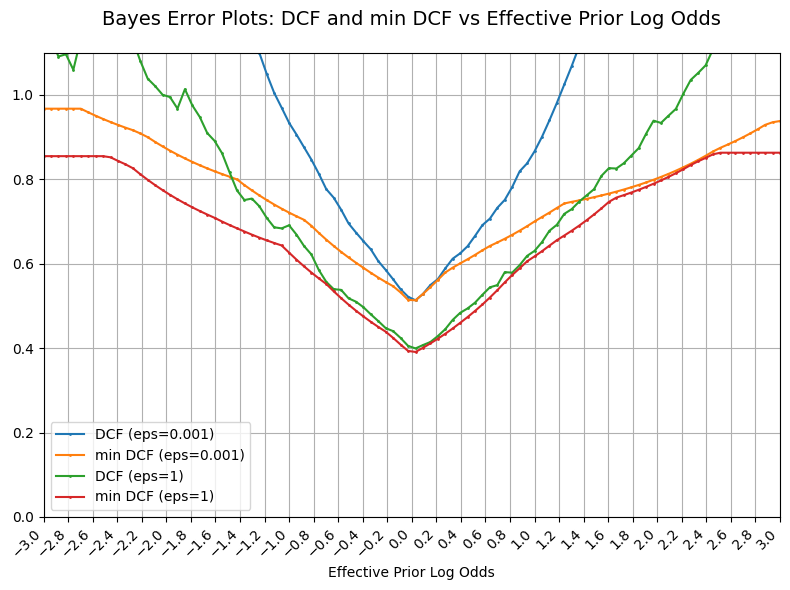

In [17]:
#Compare the two Recognizers

effPriorLogOdds = np.linspace(-3, 3, 100) #range of log odds ratios

models = [
    [effPriorLogOdds, log_likelihoods_infpar, labels_infpar, "eps=0.001"],
    [effPriorLogOdds, llr_infPar_eps1, labels_infPar_eps1, "eps=1"]
]

BDME.plotBayesErrorPlotsMoreModels(models) #plot the Bayes error plots for the two models

We can conclude that the second model is superior over a wide range of applications (lower DCF), and
also produces better calibrated scores (lower gap between DCF and minimum DCF).


## Multiclass evaluation
We're moving into the realm of multiclass classification. The key difference between multiclass classification and binary classification is that the operating conditions are no longer governed by a single prior log-odds, and the decision rules involve comparing costs across multiple classes, so multiclass classification is generally **more complex**. As a matter of fact, in multiclass problem there are $K > 2$ distinct classes and instead of a single Prior probability $\pi_{H_T}$ determining the balance between all classes (as it was in the binary case), we now have a vector of Priors $\boldsymbol{\pi} = [\pi_0, \pi_1, \pi_2, ..., \pi_{K-1}]$ having $K$ Priors (one for each class) and satisying the probability contraint: $\sum_{k=0}^{K-1} \pi_k = 1$. Also the Cost matrix $\mathbf{C}$ is now more complex as it is now a $K \times K$ matrix, where $C_{i, j}$ is the cost of classifying a test sample actually belonging to class $j$ as class $i$. While the diagonal elements are typically zero because there's usually no cost in making the correct prediction ($C_{i,i}=0$), the off-diagonal elements $C_{i,j}$ where $i \neq j$
can have arbitrary relationships, introducing more independent parameters than in the binary case (where only $C_{fp}$ and $C_{fn}$ are independent after normalization). <br>
**The most important drawback here is that we cannot represent the whole application using a single paramater like the effective Prior $\tilde{\pi}$ used in the binary case**: the reduction to a single effective Prior in the binary case was possible because the decision was essentially one-dimensional (favoring one class over the other based on a single threshold). Multiclass problems introduce a higher-dimensional decision space governed by multiple Priors and a more complex cost structure, requiring the consideration of trade-offs between multiple classification possibilities. <br>
For these reasons, we restrict our analysis to confusion matrices and Bayes costs. <br>
In this case we have three classes, so the cost matrix has the
form:
$$
\mathbf{C} =
\begin{array}{c|ccc}
\text{ } & \text{Class 0} & \text{Class 1} & \text{Class 2} \\
\hline
\text{Predicted 0} & 0 & C_{0,1} & C_{0,2} \\
\text{Predicted 1} & C_{1,0} & 0 & C_{1,2} \\
\text{Predicted 2} & C_{2,0} & C_{2,1} & 0
\end{array}
=
\begin{bmatrix}
0 & C_{0,1} & C_{0,2} \\
C_{1,0} & 0 & C_{1,2} \\
C_{2,0} & C_{2,1} & 0
\end{bmatrix}
$$
where $\text{Class 0} = C_0$ is *Inferno*, $\text{Class 1} = C_1$ is *Purgatorio* and $\text{Class 2} = C_2$ is *Paradiso*. <br>
The vector of Priors is this:
$$
\boldsymbol{\pi} =
\begin{bmatrix}
\pi_0 \\
\pi_1 \\
\pi_2
\end{bmatrix}
$$
where $\sum_{k=0}^{K-1} \pi_k = \pi_0 + \pi_1 + \pi_2 = 1$ (Rule of Probability). <br>
The Bayes cost of classifying a test sample $x_t$ as belonging to class $c$ can be computed as
$$
C_{x_t,\mathcal{R}}(c) = \sum_{k=0}^{K-1} C_{c,k}P(C = k|x_t, \mathcal{R})
$$

In [18]:
#load log-lieklihoods and labels for the 3 class problem
ll_commedia = np.load("../data/commedia_ll.npy")
labels_commedia = np.load("../data/commedia_labels.npy")
print(f"ll_commedia shape: {ll_commedia.shape}")
print(f"labels_commedia shape: {labels_commedia.shape}")

ll_commedia shape: (3, 1204)
labels_commedia shape: (1204,)


In [19]:
#Prios vectors
PriorsVect = np.array([0.3, 0.4, 0.3])
print(f"PriorsVect shape: {PriorsVect.shape}") #check the shape of the Priors vector
print(f"PriorsVect:\n{PriorsVect}") #check the values of the Priors vector


#Cost Matrix
C = np.array([[0, 1, 2], [1, 0, 1], [2, 1, 0]])
print(f"\nCost Matrix shape: {C.shape}") #check the shape of the Cost Matrix
print(f"Cost Matrix:\n{C}") #check the values of the Cost Matrix

PriorsVect shape: (3,)
PriorsVect:
[0.3 0.4 0.3]

Cost Matrix shape: (3, 3)
Cost Matrix:
[[0 1 2]
 [1 0 1]
 [2 1 0]]


In [20]:
#Compute the matrix of the Posterior probabilities for the 3 class problem

#so first compute the joint from the lieklihoods and the priors
SJoint = MVG.computeSJoint(ll_commedia, PriorsVect, useLog=True) #compute the joint densities by multiplying the score matrix S with the Priors
print(f"Joint densities shape: {SJoint.shape}")

#then compute the posteriors by normalizing the joint densities
SPost = MVG.computePosteriors(SJoint, useLog=True) #compute the posteriors by normalizing the joint densities
print(f"Posteriors shape: {SPost.shape}")


Joint densities shape: (3, 1204)
Posteriors shape: (3, 1204)


So far, we've computed the matrix of the Posteriors. So, for each one of the $1024$ samples, we have the column vector of the three Posteriors for the three classes, according to the Recognizer $\mathcal{R}$:
$$
\mathbf{P}_{x_t,\mathcal{R}} =
\begin{bmatrix}
P(C = 0|x_t, \mathcal{R}) \\
P(C = 1|x_t, \mathcal{R}) \\
P(C = 2|x_t, \mathcal{R})
\end{bmatrix}
$$
The Posteriors Matrix has $1024$ of these vectors, one for each sample $x_t$. <br>
Then, for each sample $x_t$ we can compute its respective vector of Bayes costs
$$
\mathbf{C}_{x_t,\mathcal{R}} =
\begin{bmatrix}
C_{x_t,\mathcal{R}}(0) \\
C_{x_t,\mathcal{R}}(1) \\
C_{x_t,\mathcal{R}}(2)
\end{bmatrix}
$$
by multiplying its respective $\mathbf{P}_{x_t,\mathcal{R}}$ by the Cost Matrix $\mathbf{C}$:
$$
C_{x_t,\mathcal{R}} = \mathbf{C} \mathbf{P}_{x_t,\mathcal{R}}
$$
The, for each sample $x_t$ we just have to select the **optimal Bayes Cost** which is the minimum of all the Bayest Costs. We use this result to assign the class to the sample. So, for each sample, the optimal Bayes decision is: $c^* = \underset{c \in \{0, 1, 2\}}{\operatorname{argmin}} \{ C_{x_t, \mathcal{R}}(c) \}$. <br>
So, in terms of code, we can write:

In [21]:
OptimalCosts = BDME.optimalBayesDecisionClassifier_MultiClass(ll_commedia, labels_commedia, PriorsVect, C)
print(f"Optimal Costs shape: {OptimalCosts.shape}") #check the shape of the Optimal Costs
print(f"First 10 Predicted Classes: {OptimalCosts[:10]}") #check the values of the Optimal Costs

Optimal Costs shape: (1204,)
First 10 Predicted Classes: [1 0 1 1 1 0 1 2 1 1]


In [22]:
ll_commedia.shape, labels_commedia.shape, PriorsVect.shape, C.shape #check the shapes of the inputs to the function

((3, 1204), (1204,), (3,), (3, 3))

In [23]:
confMatrix, DCF_u, DCF = BDME.computeEmpiricalBayesRisk_Normalized_MultiClass(ll_commedia, labels_commedia, PriorsVect, C) #compute the empirical Bayes risk
print(f"Confusion Matrix:\n{confMatrix}") #print the confusion matrix
print(f"Unnormalized DCF: {DCF_u}") #print the unnormalized DCF
print(f"Normalized DCF: {DCF}") #print the normalized DCF

Confusion Matrix:
[[205. 111.  56.]
 [145. 199. 121.]
 [ 50.  92. 225.]]
Unnormalized DCF: 0.5596206467661692
Normalized DCF: 0.9327010779436153


If now we have another application with **uniform class Priors and costs**:
$$
\boldsymbol{\pi} = \left[\frac{1}{3}, \frac{1}{3}, \frac{1}{3}\right]
$$
$$
\mathbf{C} =
\begin{bmatrix}
0 & C_{0,1} & C_{0,2} \\
C_{1,0} & 0 & C_{1,2} \\
C_{2,0} & C_{2,1} & 0
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{bmatrix}
$$
we obtain:

In [24]:
PriorsVect_uniform = np.array([1/3, 1/3, 1/3]) #uniform priors for the three classes
C_uniform = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]]) #uniform cost matrix for the three classes
confMatrix_uniform, DCF_u_uniform, DCF_uniform = BDME.computeEmpiricalBayesRisk_Normalized_MultiClass(ll_commedia, labels_commedia, PriorsVect_uniform, C_uniform) #compute the empirical Bayes risk
print(f"Confusion Matrix:\n{confMatrix_uniform}") #print the confusion matrix
print(f"Unnormalized DCF: {DCF_u_uniform}") #print the unnormalized DCF
print(f"Normalized DCF: {DCF_uniform}") #print the normalized DCF

Confusion Matrix:
[[210. 113.  61.]
 [137. 191. 111.]
 [ 53.  98. 230.]]
Unnormalized DCF: 0.4759121061359867
Normalized DCF: 0.7138681592039802
